In [1]:
!pip install -q opendatasets

In [2]:
import opendatasets as od

In [3]:
od.download('https://www.kaggle.com/datasets/puneet6060/intel-image-classification')

Skipping, found downloaded files in "./intel-image-classification" (use force=True to force download)


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sn
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import seaborn as sn
import cv2
import tensorflow as tf
from tqdm import tqdm
%matplotlib inline

In [5]:
class_names = ['mountain' , 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [6]:
def loading_data():
  datasets = ['/content/intel-image-classification/seg_train/seg_train','/content/intel-image-classification/seg_test/seg_test']
  output = []

  for dataset in datasets:
    images = []
    labels = []

    print('Loading {}'.format(dataset))

    for folder in os.listdir(dataset):
      label = class_names_label[folder]

      for file in tqdm(os.listdir(os.path.join(dataset, folder))):


        img_path = os.path.join(os.path.join(dataset, folder), file)


        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, IMAGE_SIZE)

        images.append(image)
        labels.append(label)

    images = np.array(images, dtype = 'float32')
    labels = np.array(labels, dtype = 'int32')

    output.append((images, labels))

  return output

In [7]:
(train_imgs, train_labels) , (test_imgs, test_labels) = loading_data()

Loading /content/intel-image-classification/seg_train/seg_train


100%|██████████| 2512/2512 [00:04<00:00, 570.25it/s]


Loading /content/intel-image-classification/seg_test/seg_test


100%|██████████| 525/525 [00:00<00:00, 1046.55it/s]


In [8]:
train_imgs, train_labels = shuffle(train_imgs, train_labels, random_state = 25)

In [9]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print("Number of training examples: {}".format(n_train))
print("Number of testing examples: {}".format(n_test))
print("Each image os of size: {}".format(IMAGE_SIZE))


Number of training examples: 14034
Number of testing examples: 3000
Each image os of size: (150, 150)


In [10]:
np.unique(train_labels, return_counts = True)

(array([0, 1, 2, 3, 4, 5], dtype=int32),
 array([2512, 2382, 2404, 2191, 2274, 2271]))

In [11]:
train_counts = np.unique(train_labels, return_counts = True)
train_counts

(array([0, 1, 2, 3, 4, 5], dtype=int32),
 array([2512, 2382, 2404, 2191, 2274, 2271]))

<Axes: >

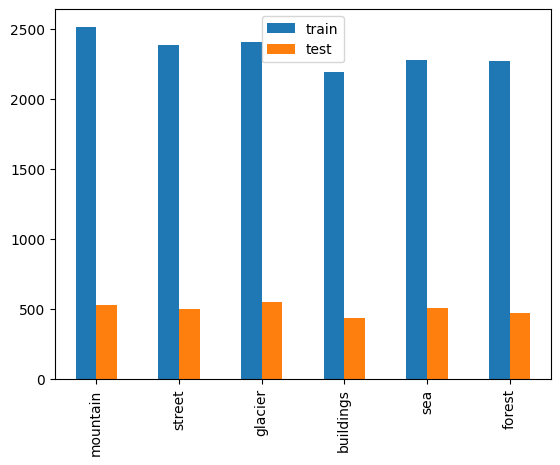

In [12]:
_, train_counts = np.unique(train_labels, return_counts = True)
_, test_counts = np.unique(test_labels, return_counts = True)
pd.DataFrame({'train': train_counts,
              'test': test_counts}, index  = class_names).plot.bar()

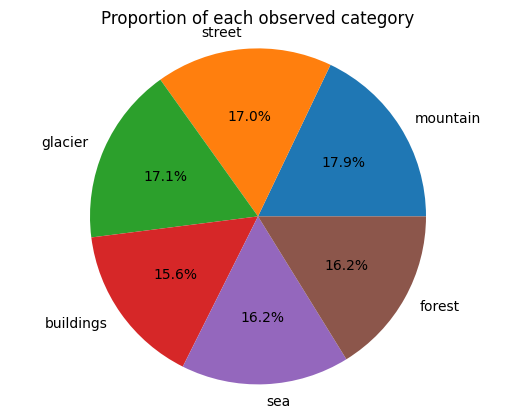

In [13]:
plt.pie(train_counts, explode = (0,0,0,0,0,0),labels = class_names, autopct = "%1.1f%%")
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [14]:
train_imgs = train_imgs / 255
test_imgs = test_imgs / 255

In [15]:
def display(class_names, images, labels):

  fig = plt.figure(figsize = (10 ,10))
  fig.suptitle('Some Examples', fontsize = 14)
  for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[labels[i]])




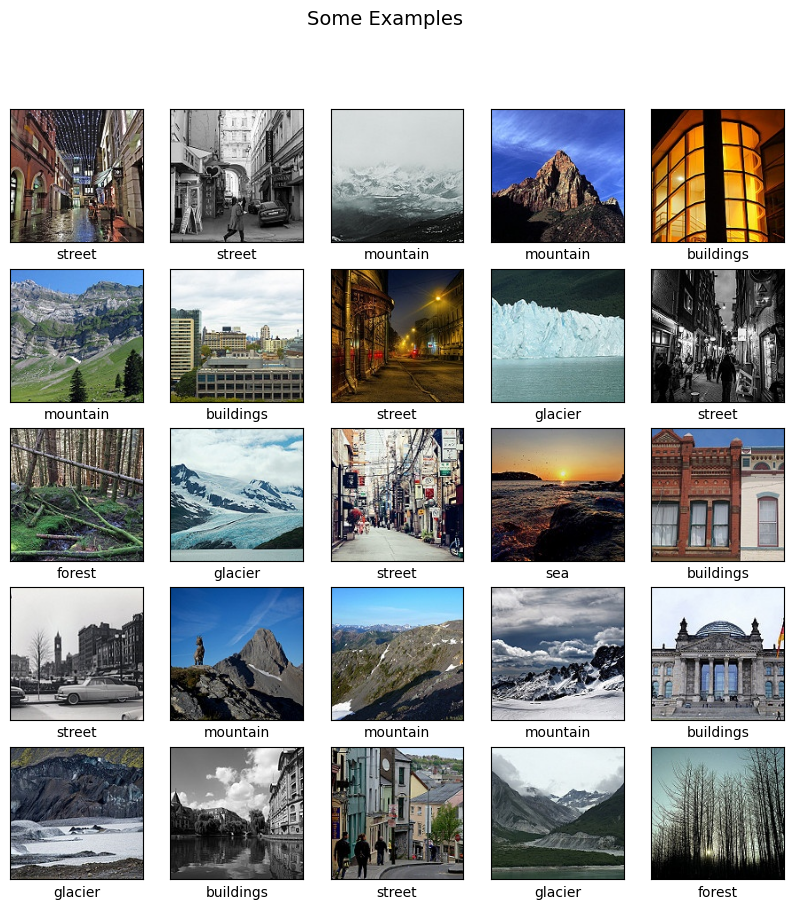

In [16]:
display(class_names, train_imgs, train_labels)

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(6, activation = tf.nn.softmax)
])

In [18]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [19]:
icepice = model.fit(train_imgs, train_labels, batch_size = 128, epochs = 20, validation_split = 0.2)

Epoch 1/20
88/88 [==============================] - 22s 110ms/step - loss: 1.2468 - accuracy: 0.5471 - val_loss: 0.8469 - val_accuracy: 0.6975
Epoch 2/20
88/88 [==============================] - 6s 67ms/step - loss: 0.7554 - accuracy: 0.7296 - val_loss: 0.8373 - val_accuracy: 0.6836
Epoch 3/20
88/88 [==============================] - 5s 63ms/step - loss: 0.5956 - accuracy: 0.7891 - val_loss: 0.7842 - val_accuracy: 0.7132
Epoch 4/20
88/88 [==============================] - 6s 70ms/step - loss: 0.4758 - accuracy: 0.8350 - val_loss: 0.6660 - val_accuracy: 0.7656
Epoch 5/20
88/88 [==============================] - 6s 63ms/step - loss: 0.3623 - accuracy: 0.8773 - val_loss: 0.7384 - val_accuracy: 0.7553
Epoch 6/20
88/88 [==============================] - 6s 67ms/step - loss: 0.2454 - accuracy: 0.9239 - val_loss: 0.7532 - val_accuracy: 0.7659
Epoch 7/20
88/88 [==============================] - 6s 65ms/step - loss: 0.1680 - accuracy: 0.9497 - val_loss: 0.7952 - val_accuracy: 0.7663
Epoch 8/20


In [30]:
icepice.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [31]:
def plot_accuracy_loss(icepice):
  fig = plt.figure(figsize= (10,5))

  plt.subplot(221)
  plt.plot(icepice.history['accuracy'], 'bo--', label = "acc")
  plt.plot(icepice.history['val_accuracy'], 'ro--', label = 'val_acc')
  plt.title('train_acc vs val_acc')
  plt.ylabel('accuracy')
  plt.xlabel('epochs')
  plt.legend()

  plt.subplot(222)

  plt.plot(icepice.history['loss'], 'bo--', label = "loss")
  plt.plot(icepice.history['val_loss'], 'ro--', label = 'val_loss')
  plt.title('train_loss vs val_loss')
  plt.ylabel('loss')
  plt.xlabel('epochs')
  plt.legend()


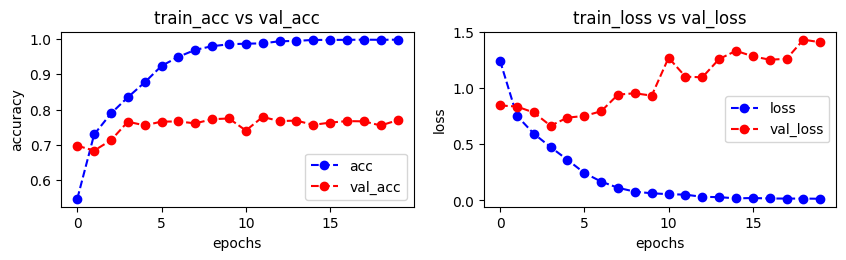

In [32]:

plot_accuracy_loss(icepice)

In [33]:
test_loss = model.evaluate(test_imgs, test_labels)

94/94 [==============================] - 1s 9ms/step - loss: 1.3673 - accuracy: 0.7597


In [35]:
predictions = model.predict(test_imgs)
pred_labels = np.argmax(predictions, axis = 1)

94/94 [==============================] - 1s 7ms/step
